Trees

In [16]:
import os
import re
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.tree as tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings

In [5]:
os.getcwd()
# from thon.Choose import choose_features
from thon.churn_functions import bake, modernize, simple_split, out_eval
# data = choose_features("data/out/features.csv", cv_range = (0, 10), save = False)

In [6]:
# features are automatically trimmed
data = pd.read_csv("./data/out/features.csv")

In [7]:
# Training data
X, y = data.drop(columns = ['n']), data['n']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, shuffle = False)
X_train, X_test, y_train, y_test = simple_split(X, y, 120)

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor())
])

In [9]:
search = GridSearchCV(pipeline,
                      {'model__ccp_alpha':np.arange(1, 30, 1)}, # cost-complexity pruning
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 1)

In [10]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__ccp_alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='neg_mean_squared_error', verbose=1)

In [12]:
search.best_params_['model__ccp_alpha']

25

In [13]:
# Training data

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(ccp_alpha=search.best_params_['model__ccp_alpha']))    
])

# Train the model
model = pipeline.fit(X_train, y_train)

# Store the fitted values as a time series with the same time index as
# the training data

pred_train = pd.Series(model.predict(X_train), index=X_train.index)
pred_test = pd.Series(model.predict(X_test), index=X_test.index)

In [24]:
import graphviz 
a = sklearn.tree.export_graphviz(model[1], out_file="thon/models/figs/tree.dot", feature_names = list(X_train)) 

In [30]:
graph = graphviz.Source(a)  
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [35]:
plot_eval(pred_train, y_train)

NameError: name 'plot_eval' is not defined

5686.417369148662
189.54724563828873


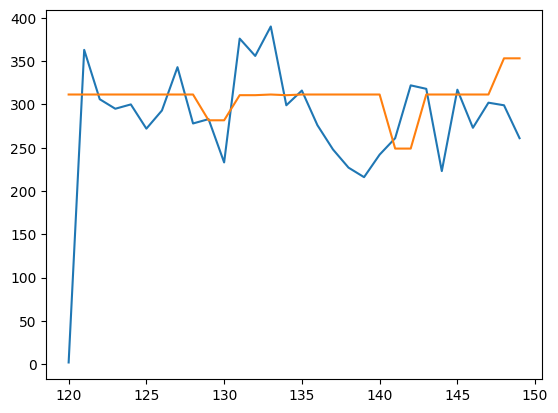

In [23]:
plot_eval(pred_test, y_test)

In [55]:
text_representation = tree.export_text(model[1], feature_names = list(X_train))

print(text_representation)

AttributeError: module 'thon.models.tree' has no attribute 'export_text'

In [56]:
imp = X_train.columns[model[1].feature_importances_ > 0]

Index(['altsales_lag3', 'AN_lag12', 'AN_v_lag3', 'BWA_v_lag6', 'F_v_lag6',
       'g_cars_for_sale_lag12', 'GT_lag3', 'HMC_v_lag3', 'industryut_lag9',
       'month', 'new_units_lag6', 'oilimport_lag12', 'TM_lag12',
       'treasurymat10_lag3', 'wagemanuf_lag12', 'XOM_lag12'],
      dtype='object')

In [14]:
# feature names used in model


In [23]:
# save_model(model, "treemodel.pkl")
np.random.seed(1933)

In [3]:
from thon.models import tree
out = tree.decision_tree(split=(119, 122),
                  scoring = 'neg_root_mean_squared_error')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__max_depth': 4}


In [4]:
# predict
pred = model.predict(modernize(X_train))


NameError: name 'model' is not defined

472.0037348272643 3081.876666666667


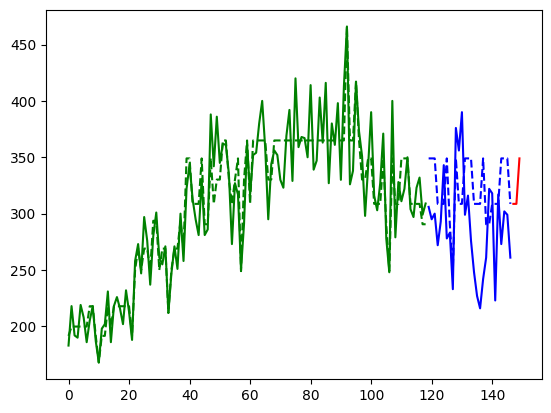

In [4]:
import sklearn
out_eval(out, sklearn.metrics.mean_squared_error)

In [18]:
out = bake(y_train, y_test, pred_train, pred_test, pred)

In [29]:
out.to_csv("data/out/tree.csv")

In [31]:
y_train.shape

(120,)